# Student Habits vs Academic Performance
Group:
by: 


In [20]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In [27]:
# read database
df = pd.read_csv("./src/student_habits_performance.csv", index_col=0)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, S1000 to S1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   i

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

## Pre-processing and Cleaning the Data

In [33]:
df_nums = df.select_dtypes(include='number')
df_cats = df.select_dtypes(exclude='number')
# check for missing values
print(f'Missing values check:\n{df_nums.isnull().sum()}')
# check for duplicates
print(f'Duplicate check:\n{df_nums.duplicated().sum()}')
# check for outliers
print(f'Outliers check:\n{df_nums.apply(lambda x: np.abs(x - x.mean()) > (3 * x.std())).sum()}')
# check for unique values in categorical columns
print(f'Unique values check:\n{df_cats.apply(lambda x: x.unique()).head(10)}')

Missing values check:
age                      0
study_hours_per_day      0
social_media_hours       0
netflix_hours            0
attendance_percentage    0
sleep_hours              0
exercise_frequency       0
mental_health_rating     0
exam_score               0
dtype: int64
Duplicate check:
0
Outliers check:
age                      0
study_hours_per_day      2
social_media_hours       3
netflix_hours            2
attendance_percentage    0
sleep_hours              0
exercise_frequency       0
mental_health_rating     0
exam_score               1
dtype: int64
Unique values check:
gender                                          [Female, Male, Other]
part_time_job                                               [No, Yes]
diet_quality                                       [Fair, Good, Poor]
parental_education_level         [Master, High School, Bachelor, nan]
internet_quality                                [Average, Poor, Good]
extracurricular_participation                               

## Understanding the Numerical Data


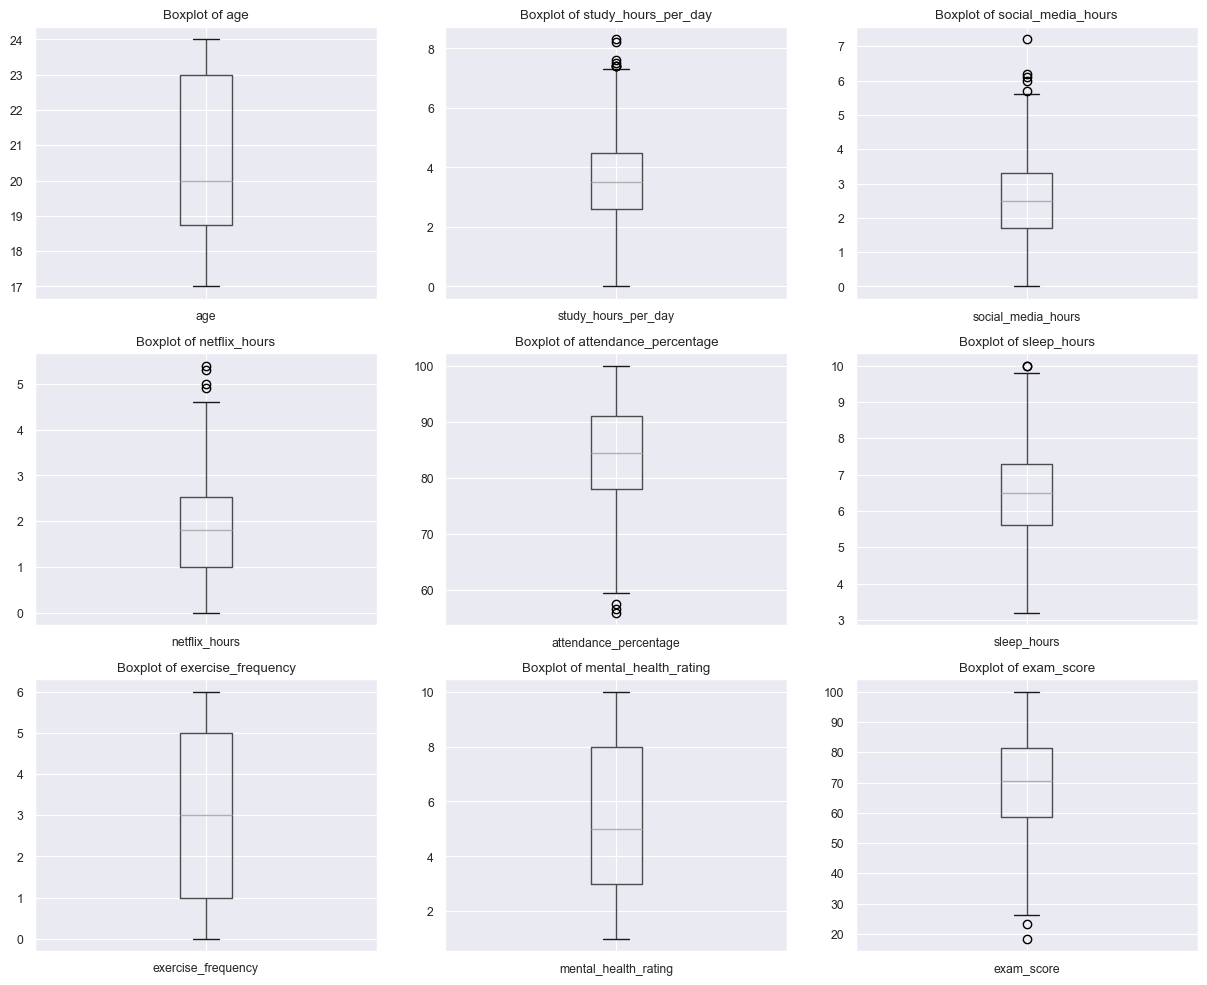

In [34]:
n_cols = 3
n_total = len(df_nums.columns)
n_rows = math.ceil(n_total/n_cols)
# create boxplots for each numeric column
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_nums.columns):
    df_nums.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    
plt.show()

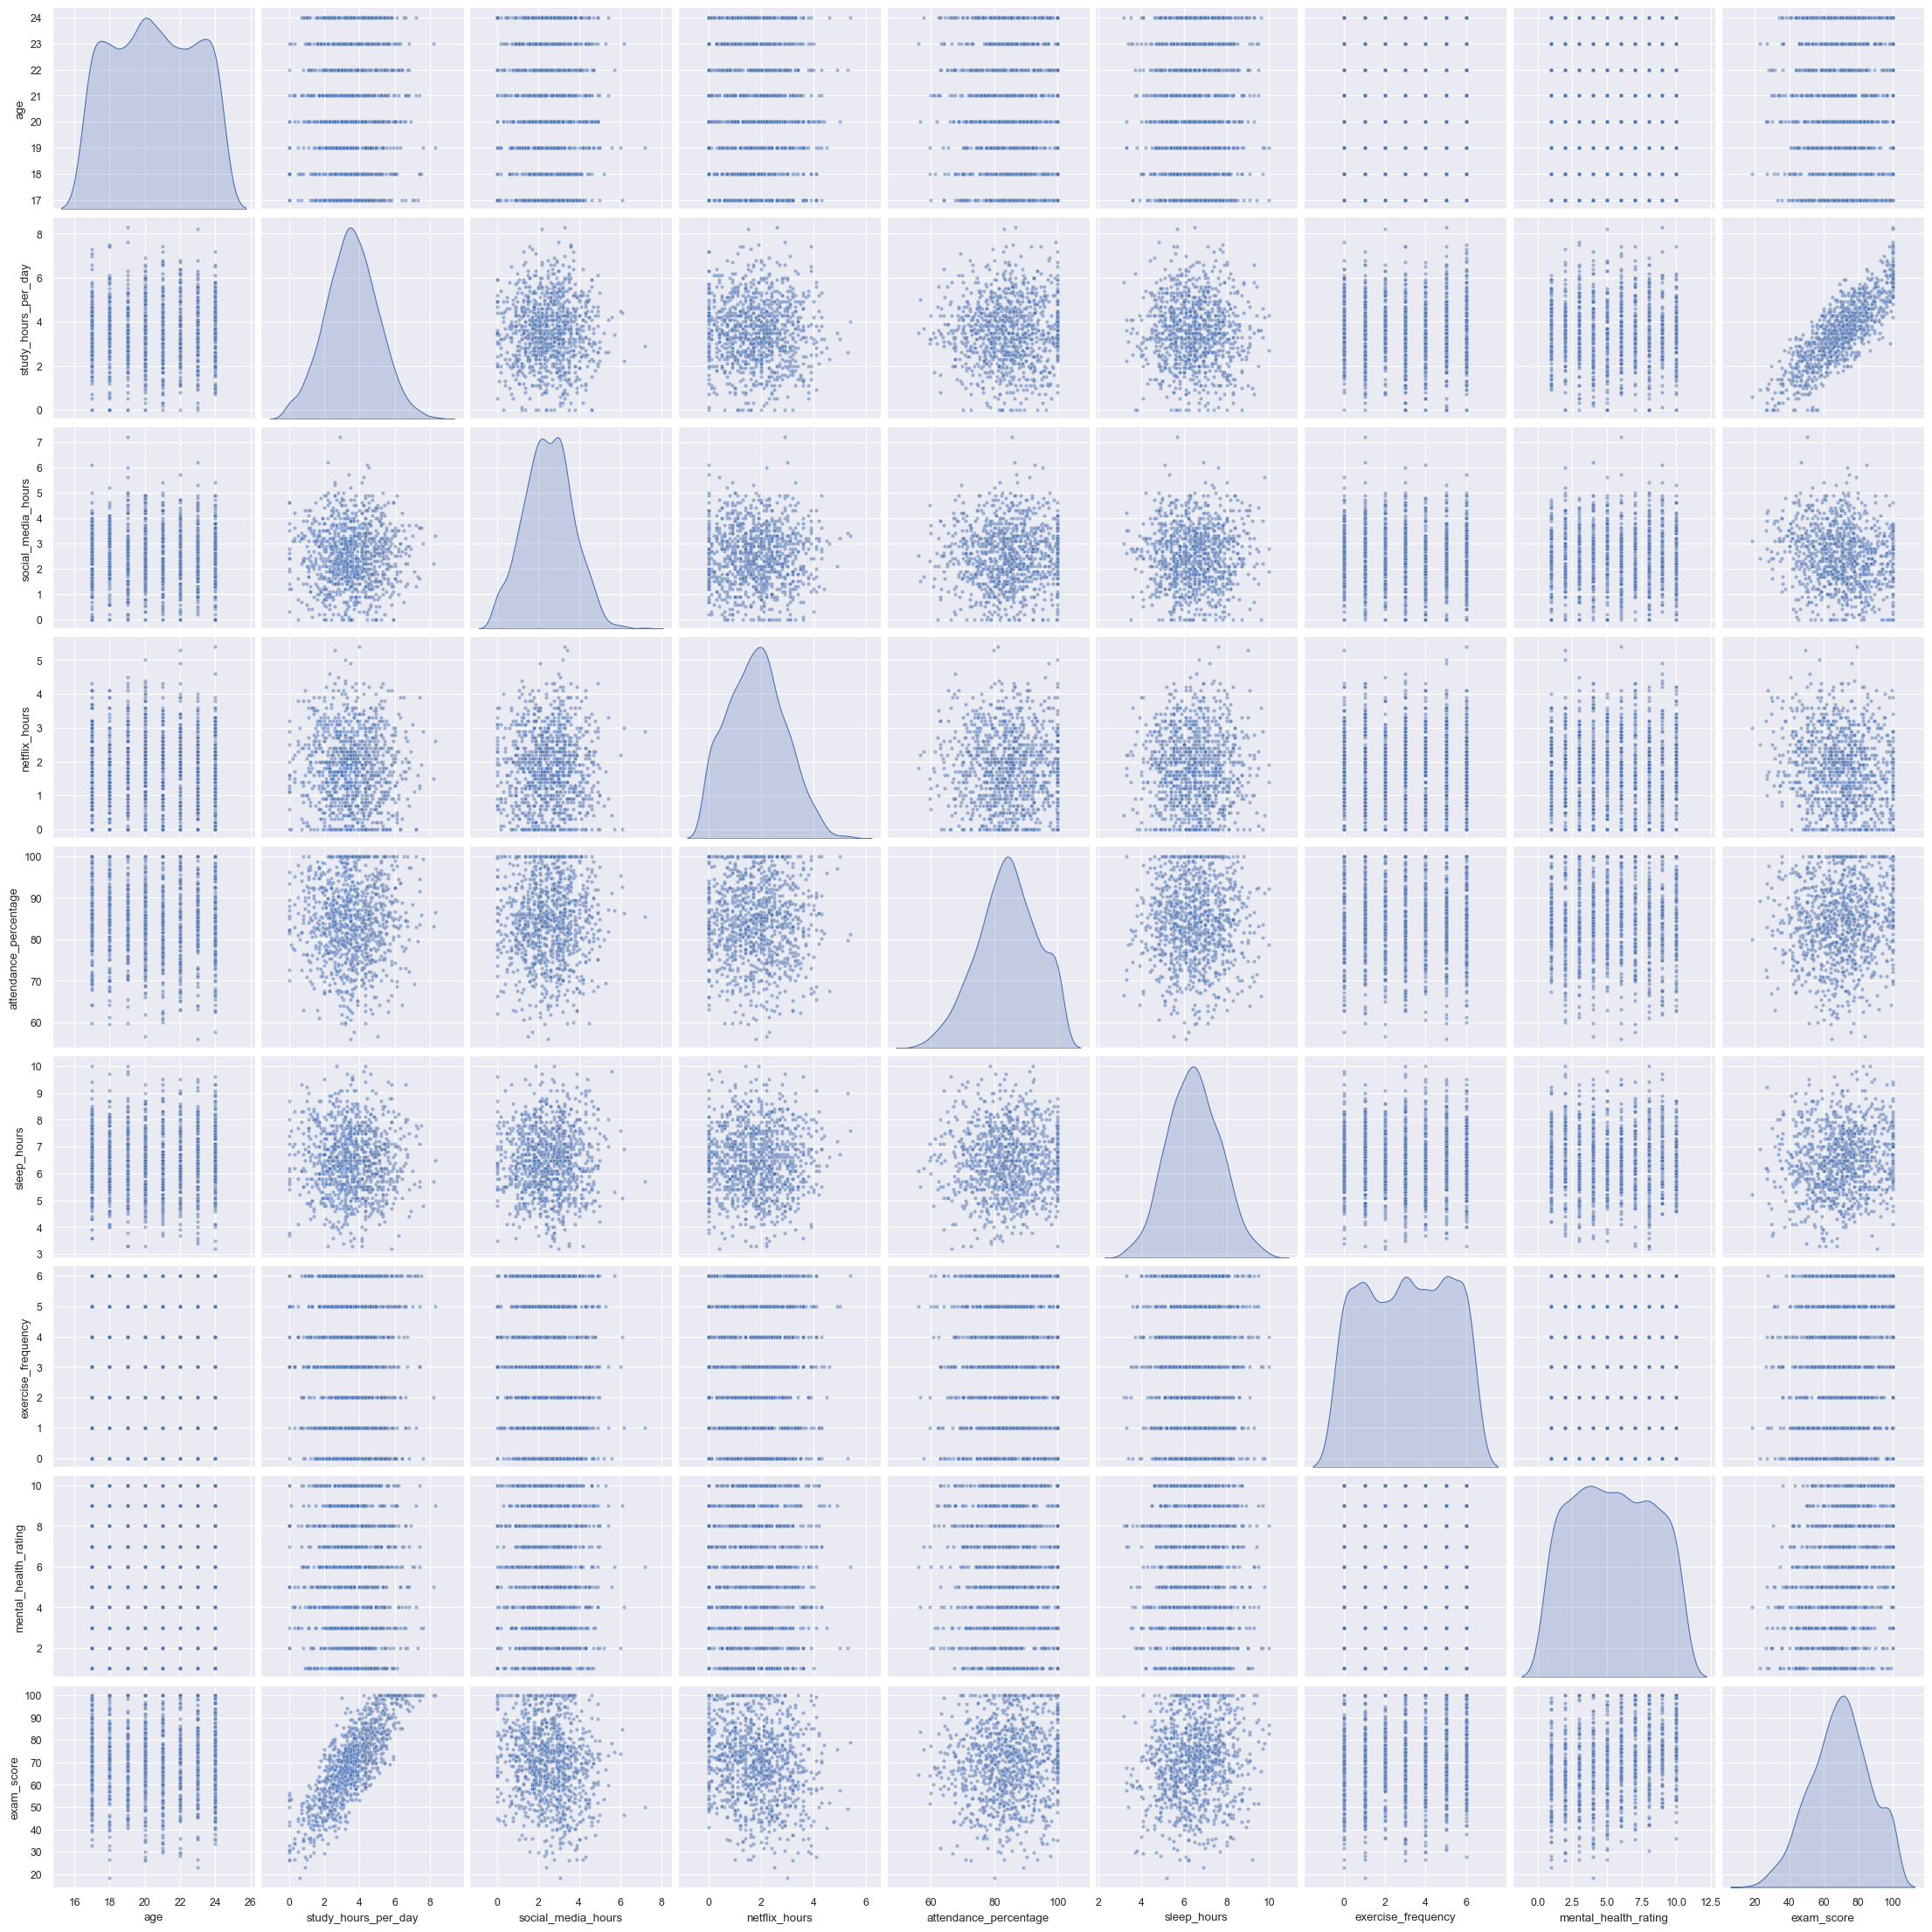

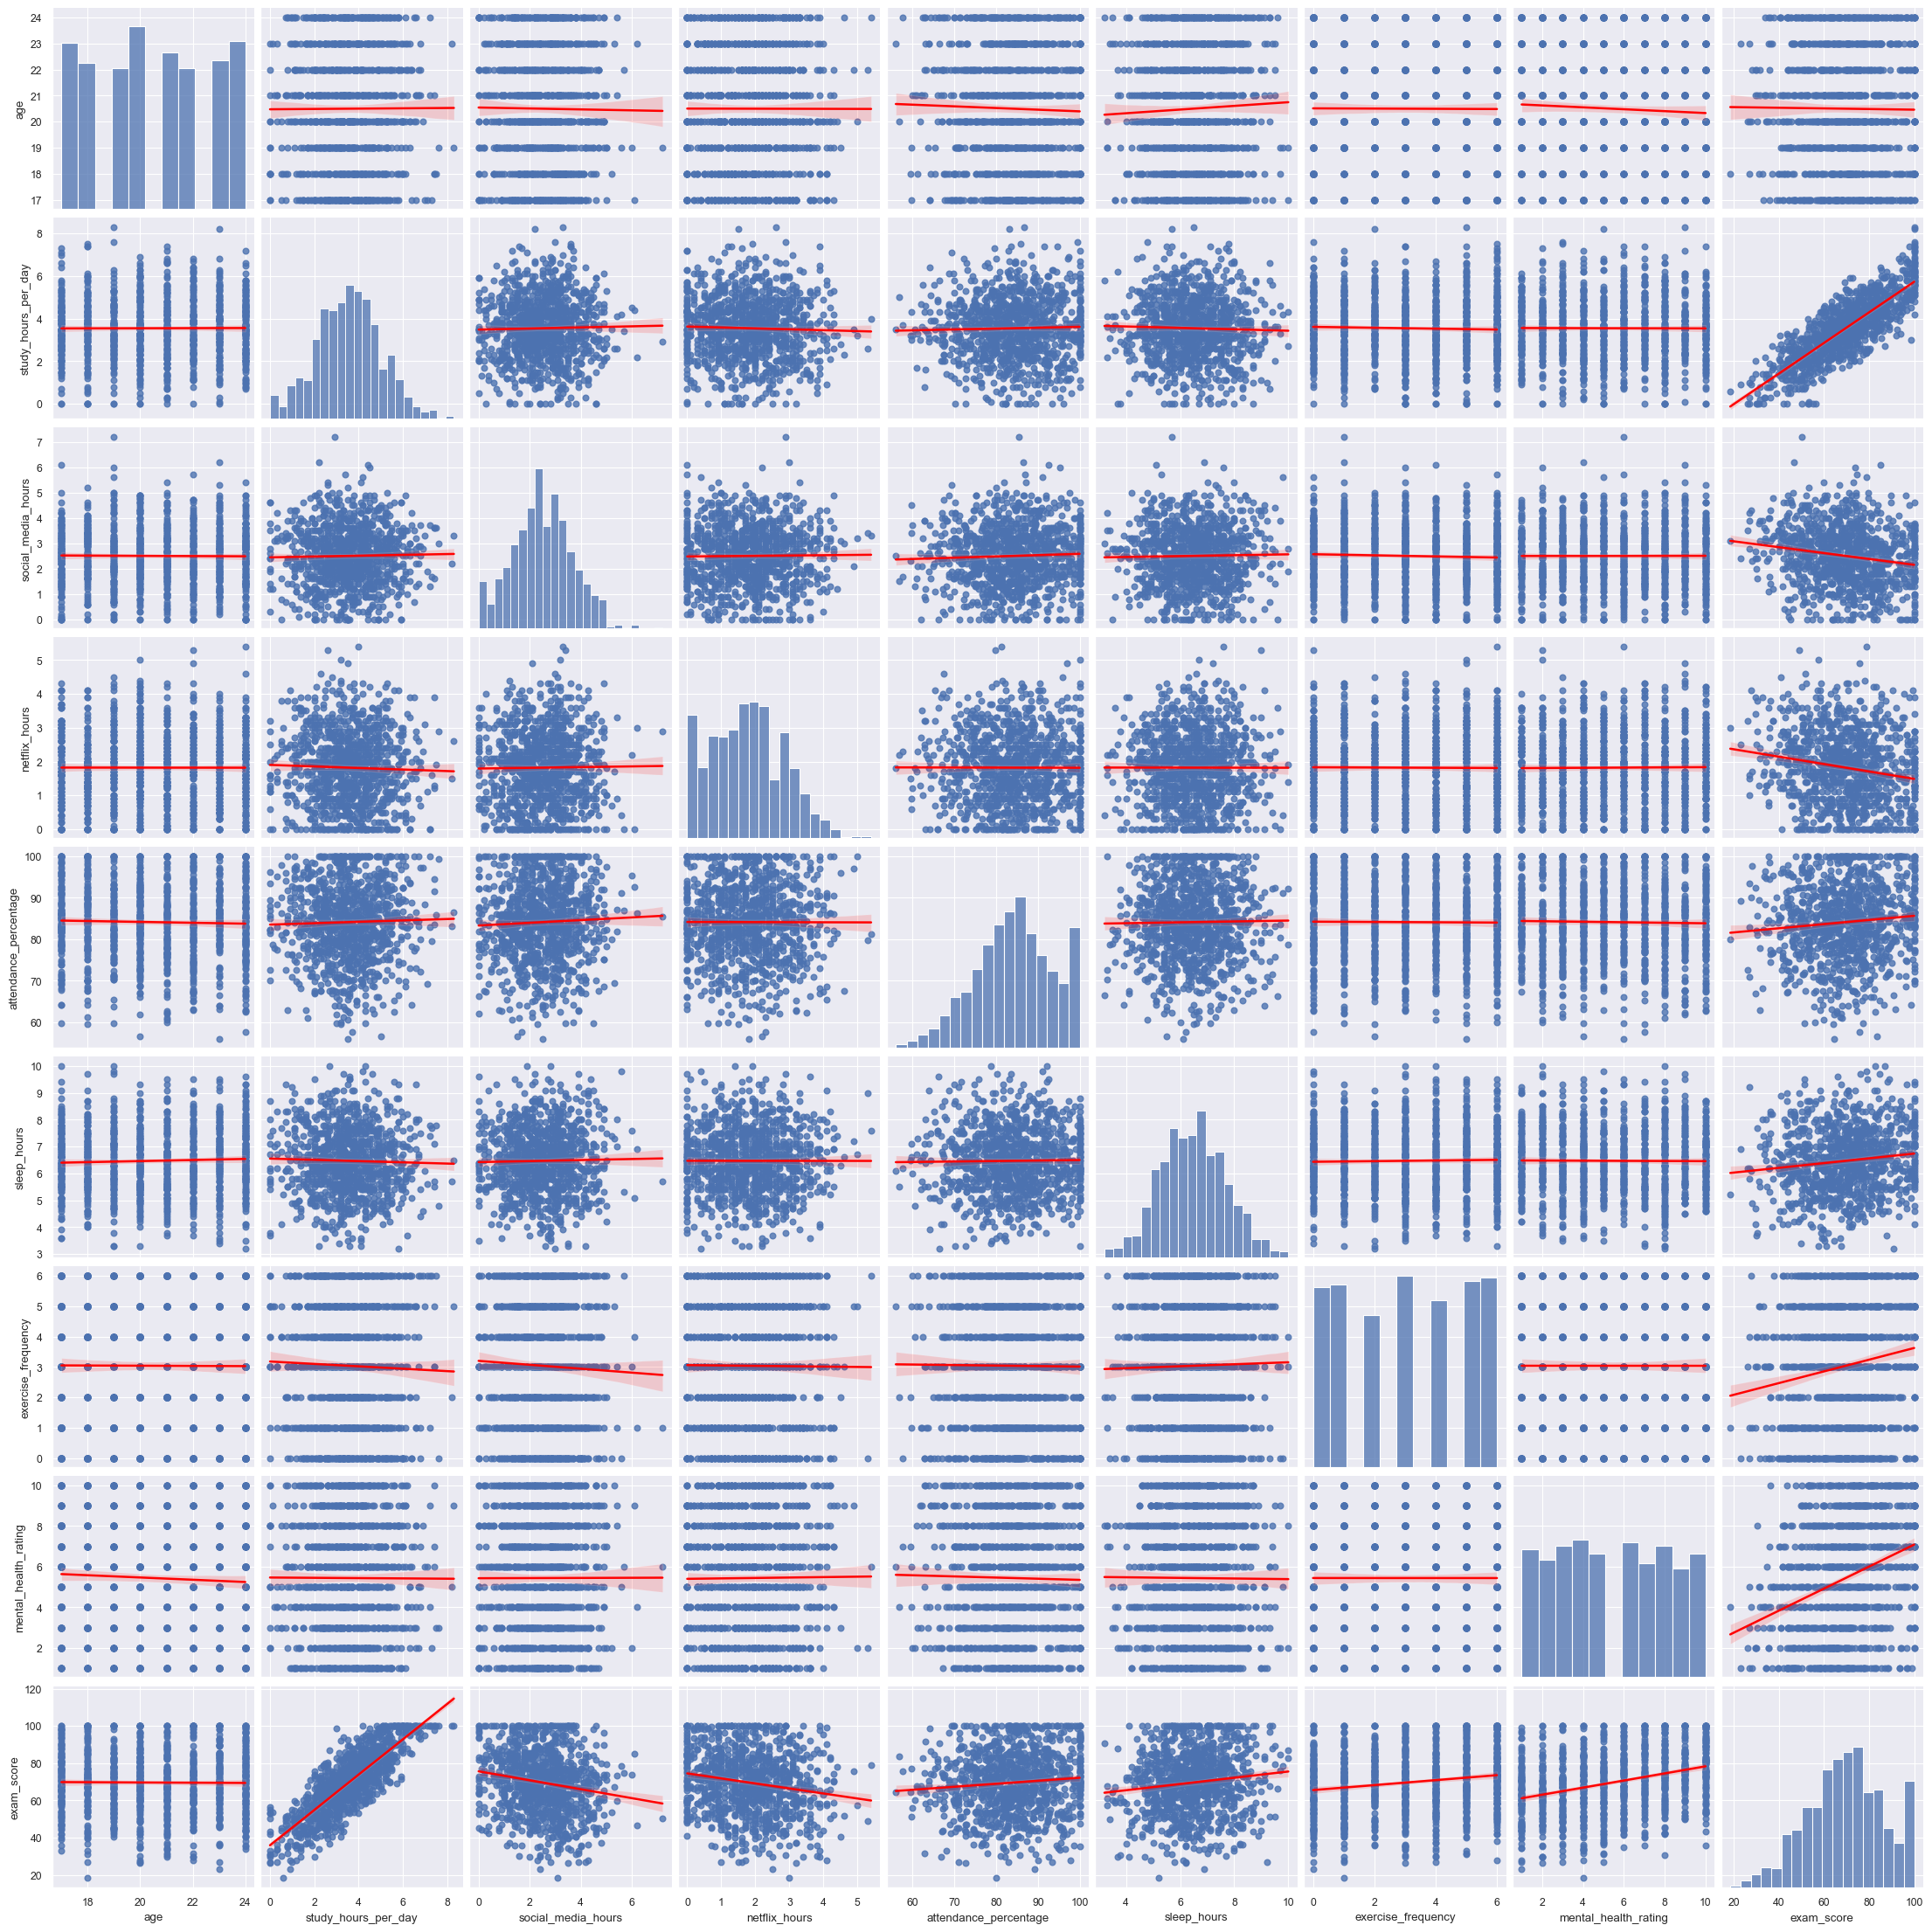

In [46]:
# create pairplot for numeric columns
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df_nums, diag_kind='kde', plot_kws={'alpha':0.5, 's':10})
plt.show()

sns.pairplot(df_nums, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

## Understanding the Categorical Data

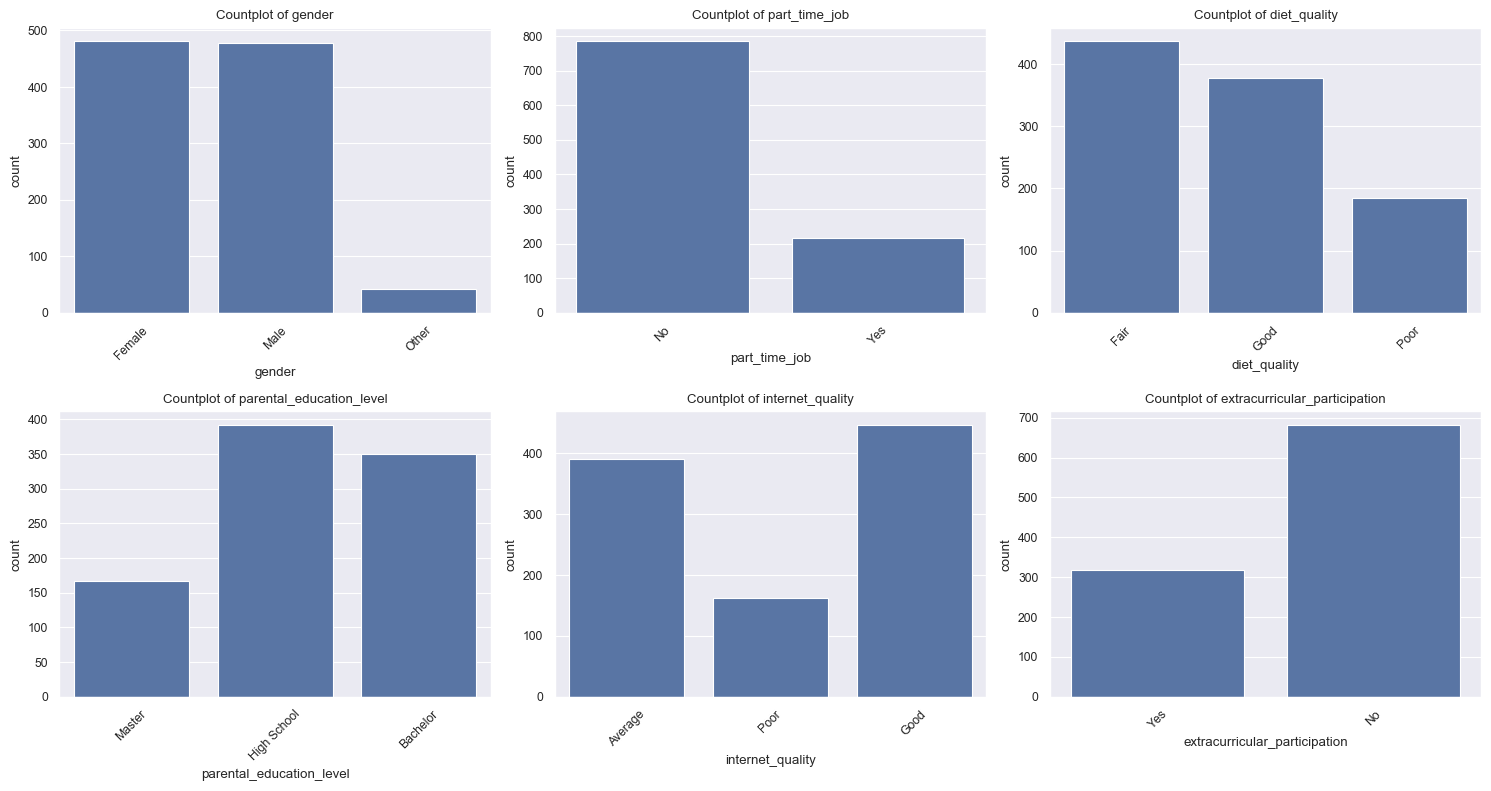

In [36]:

# Cateogrical Column Analysis
n_cols = 3
n_total = len(df_cats.columns)
n_rows = math.ceil(n_total/n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_cats.columns):
    sns.countplot(data=df_cats, x=col, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for ax in axes[n_total:]:
    ax.set_visible(False)  # Hide any unused subplots

plt.tight_layout()
plt.show()

## Discovering Numerical/Categorical Relationships

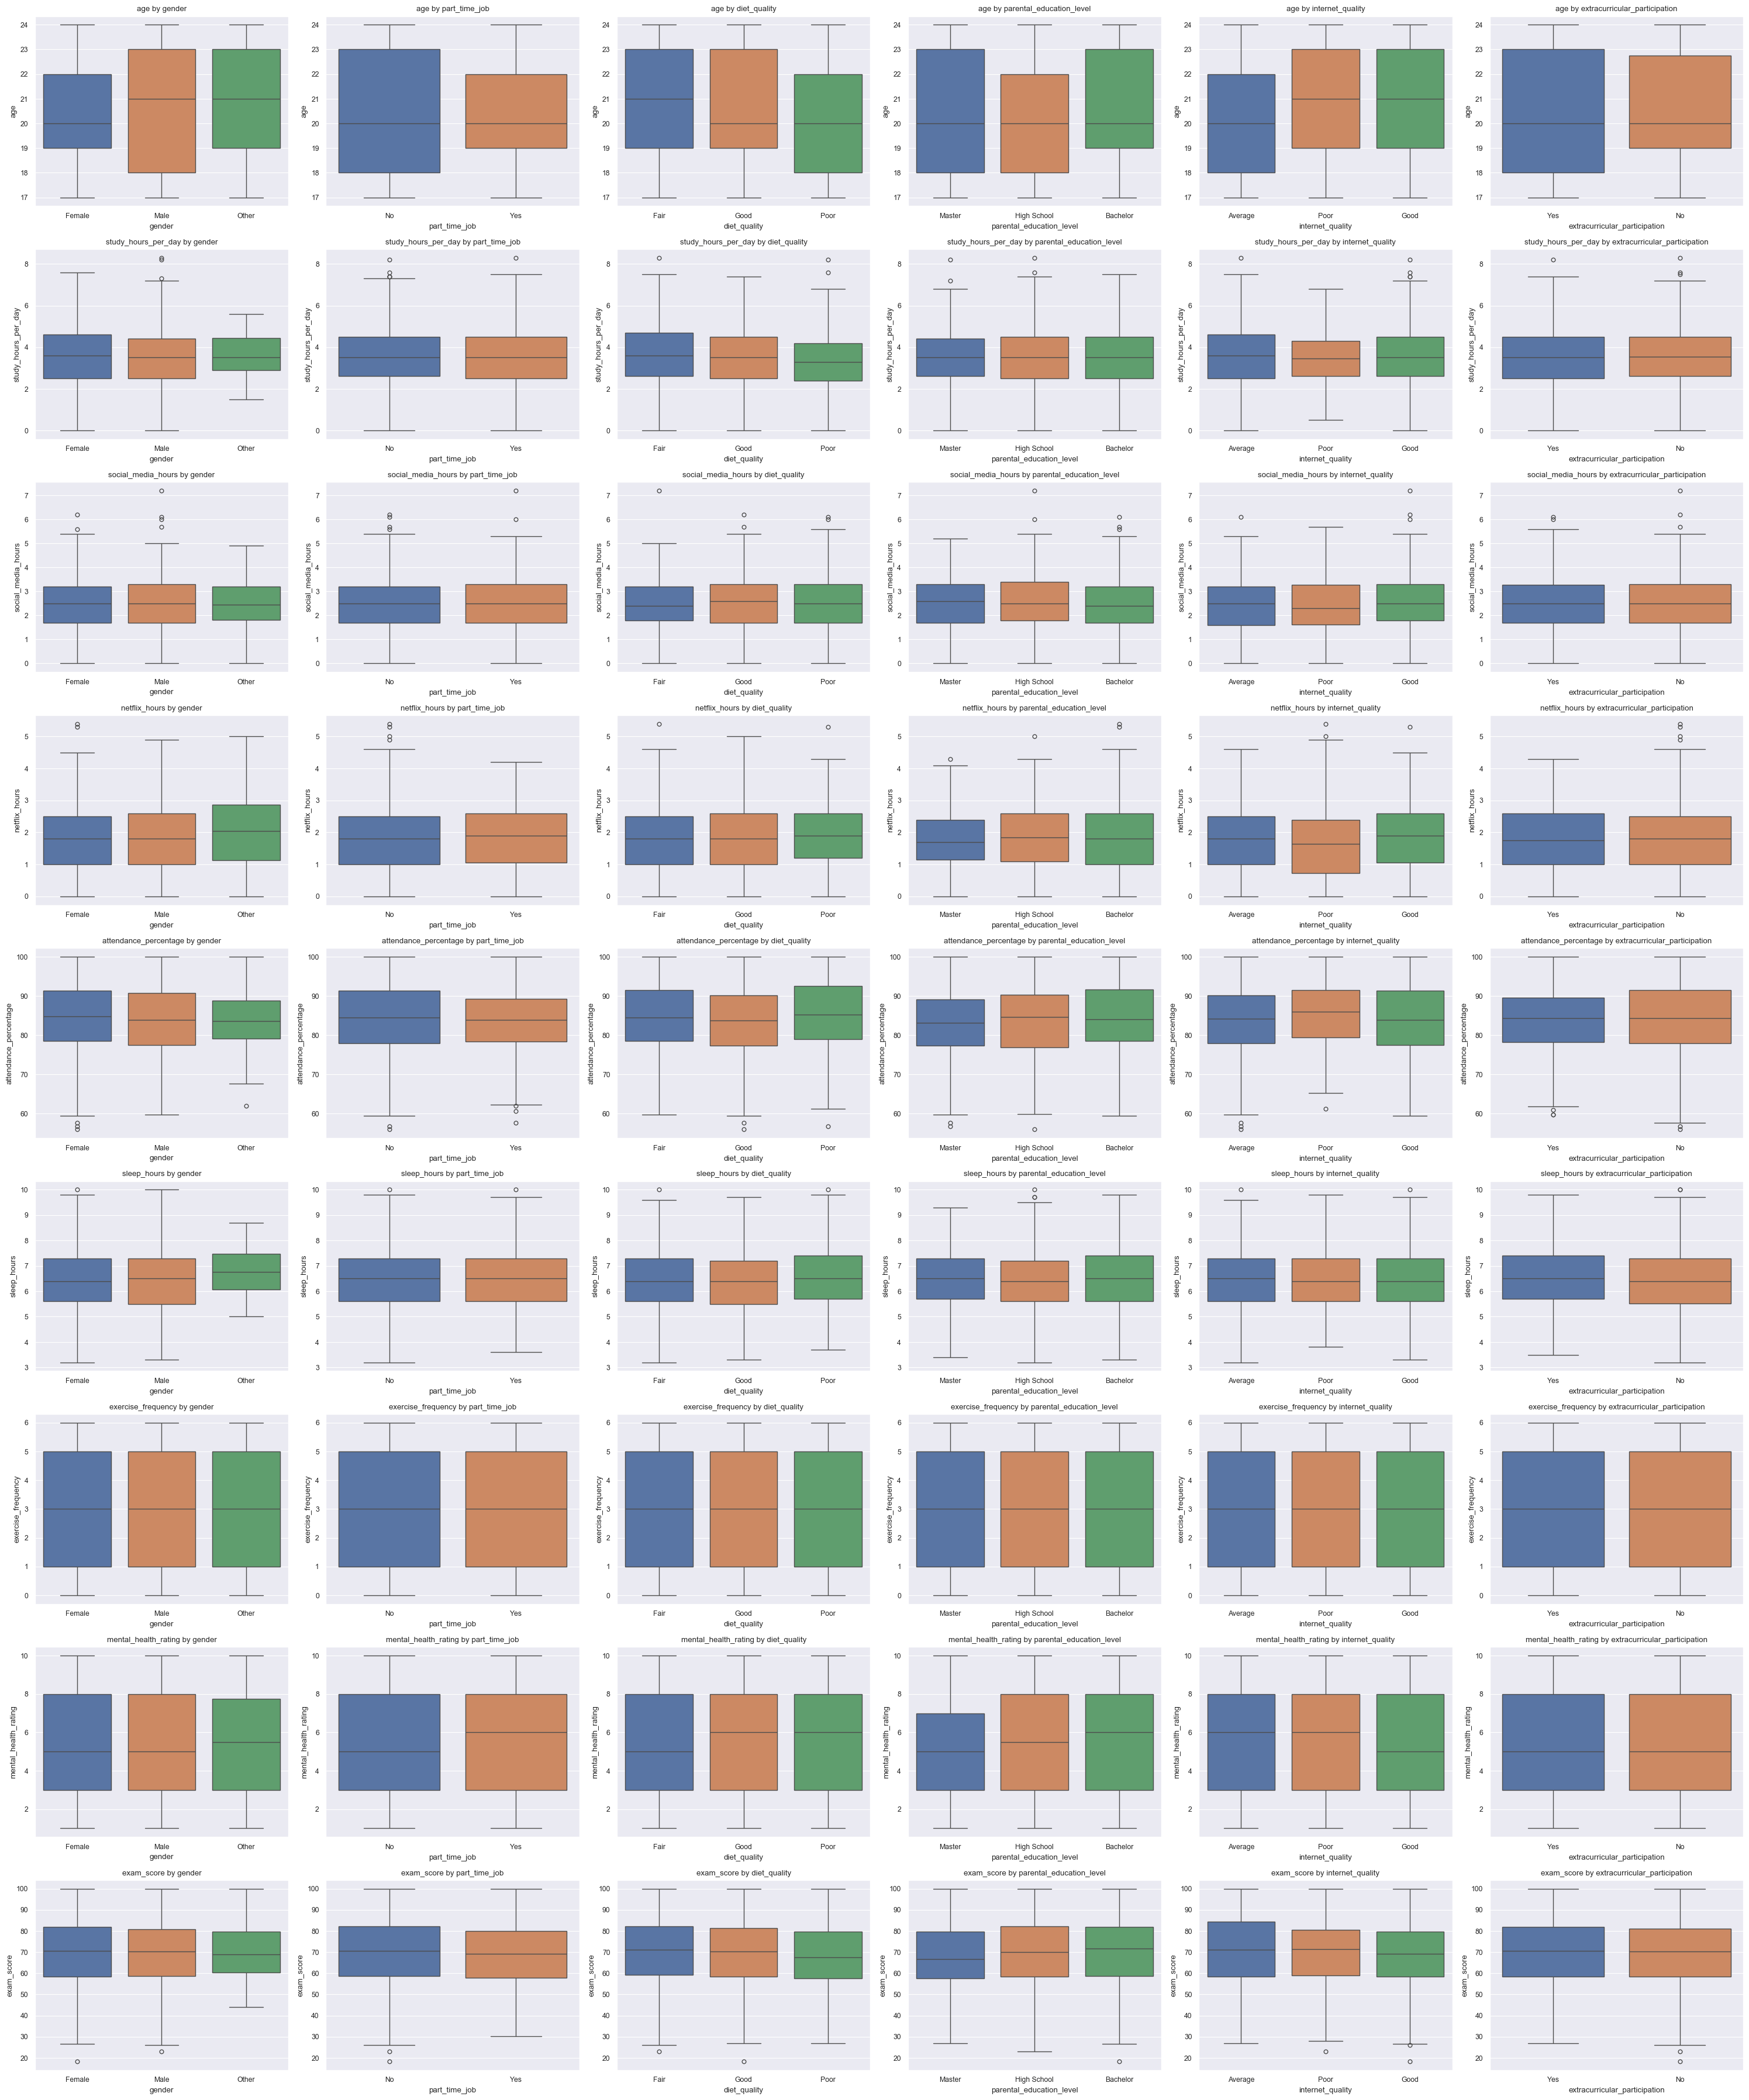

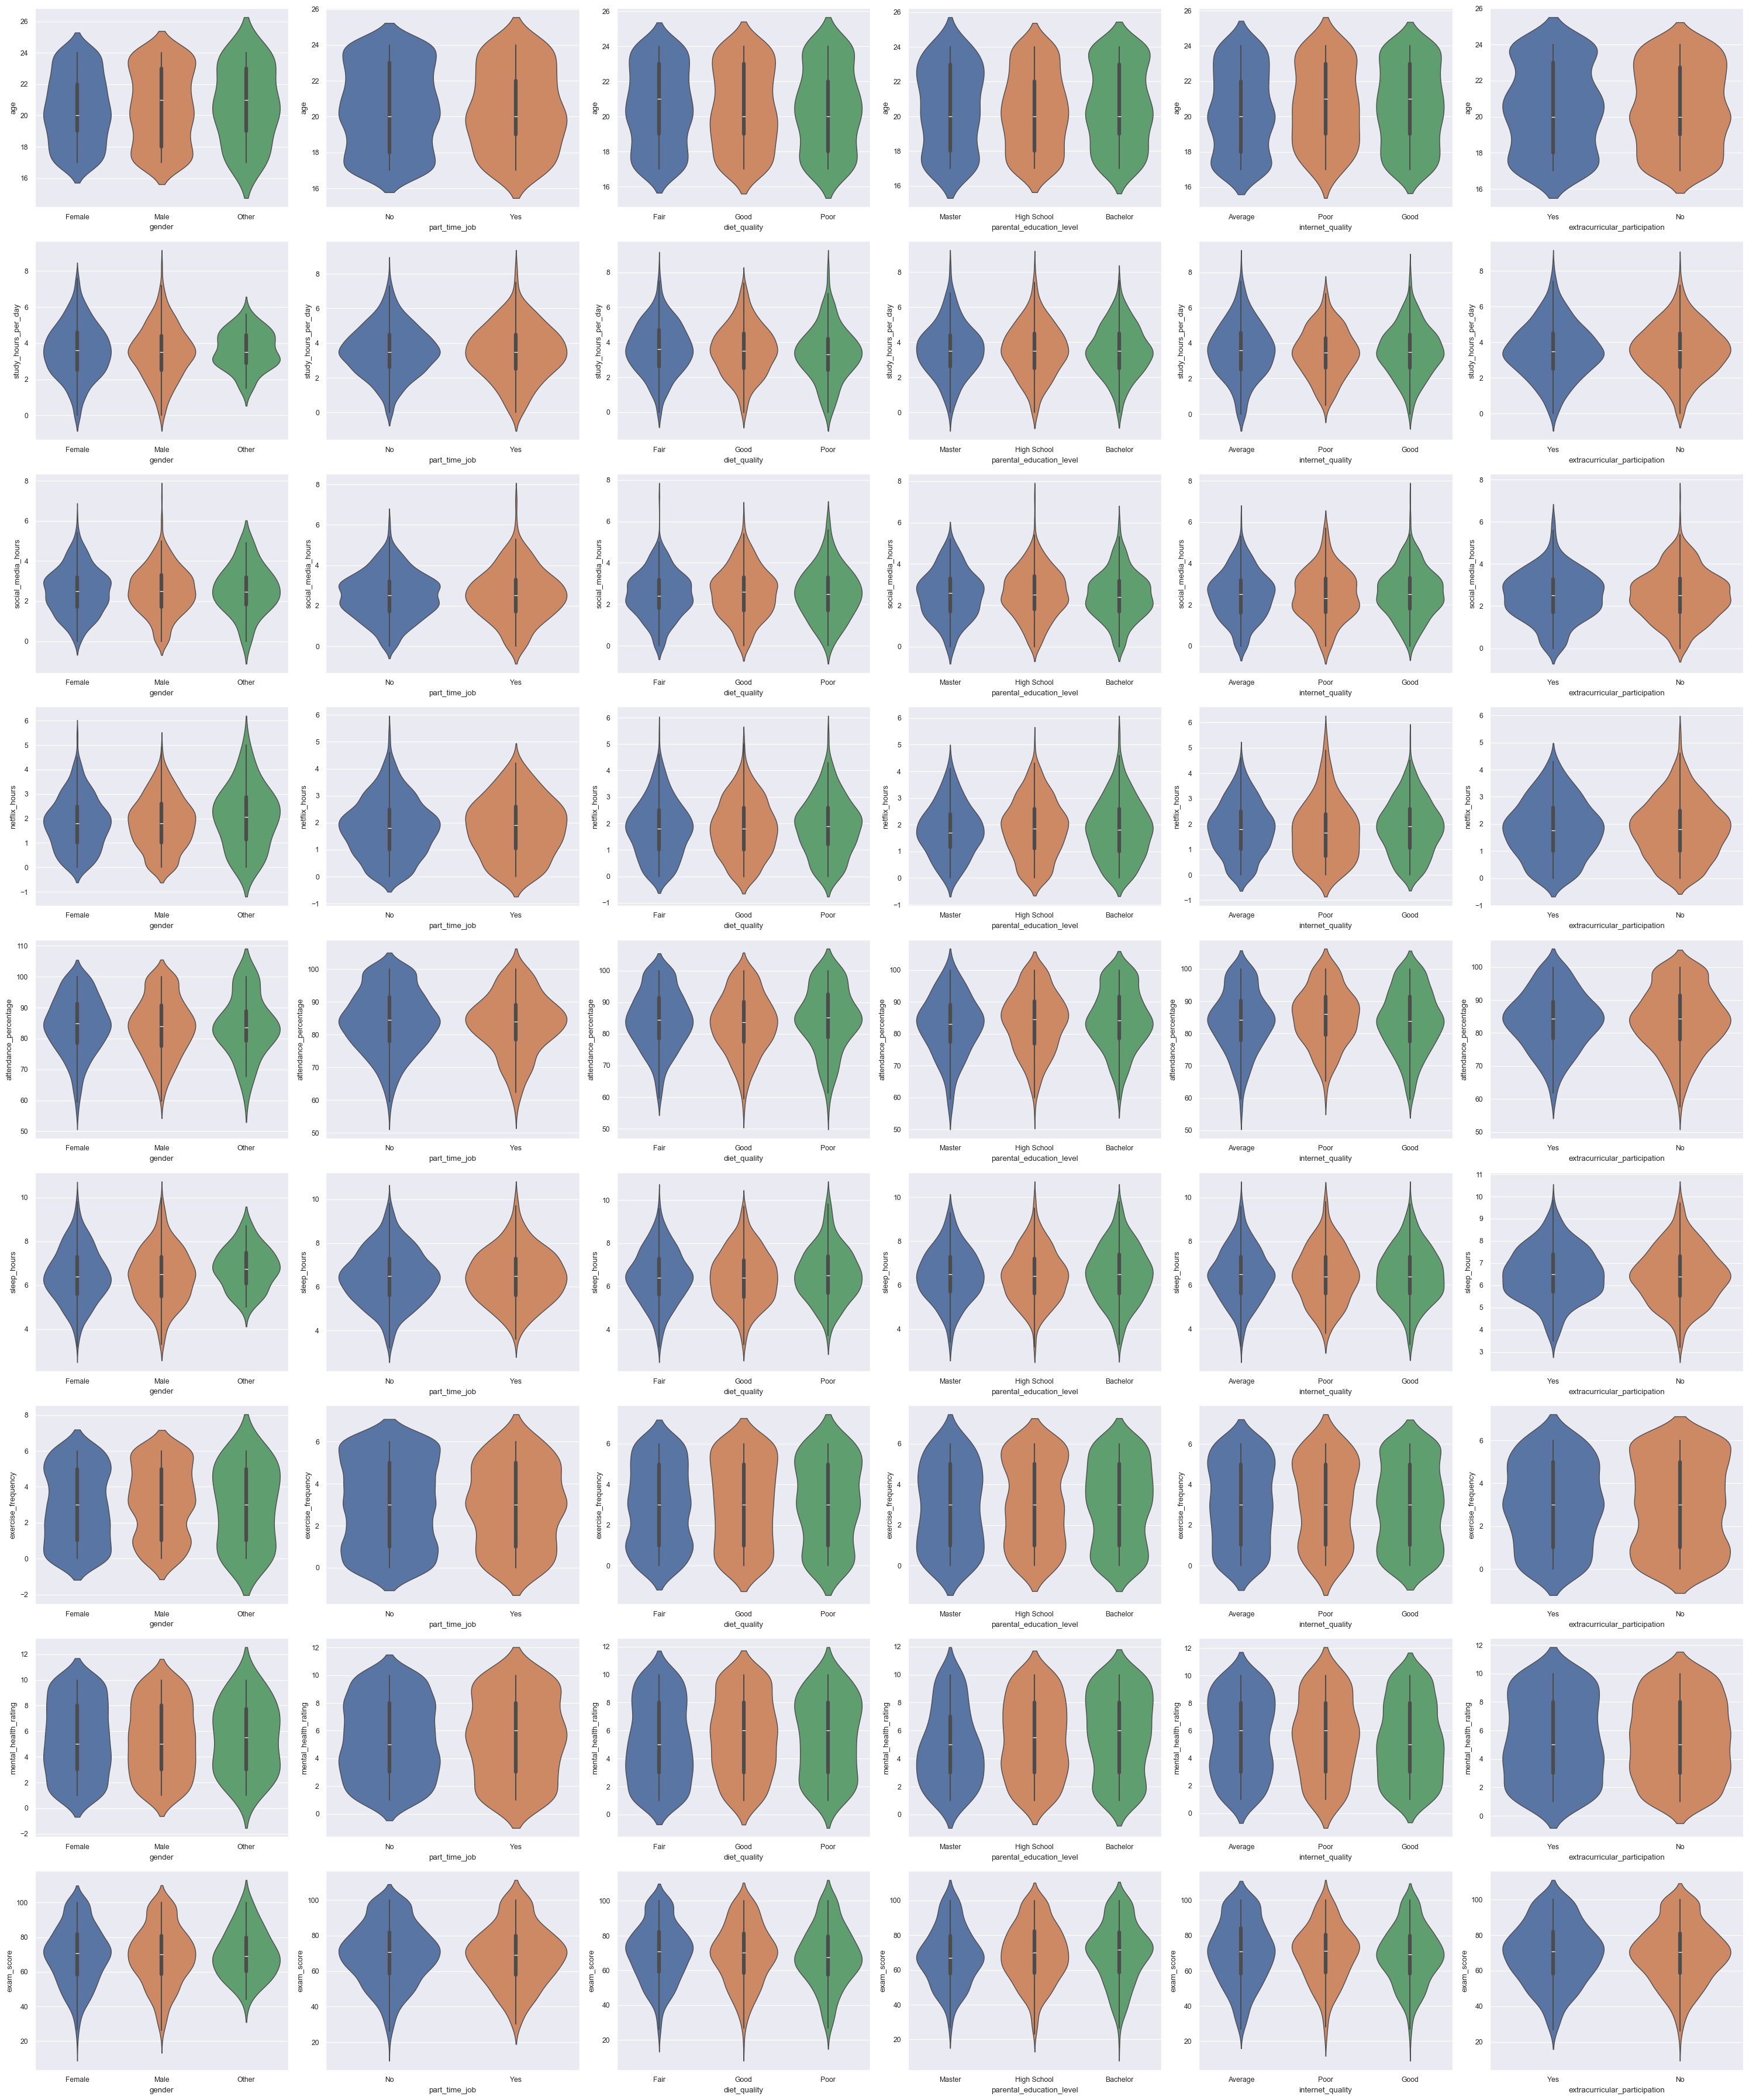

In [47]:

num_cols = df_nums.columns
cat_cols = df_cats.columns

fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5*len(cat_cols), 4*len(num_cols)))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i, j]
        sns.boxplot(x=df[cat], y=df[num], hue=df[cat], ax=ax, legend=False)
        ax.set_title(f"{num} by {cat}")
        ax.set_xlabel(cat)
        ax.set_ylabel(num)
        

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5*len(cat_cols), 4*len(num_cols)))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.violinplot(x=df[cat], y=df[num], hue=df[cat], ax=axes[i, j], legend=False)
        
        
        
plt.tight_layout()
plt.show()